### Описание проекта

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам предстоит приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Содержание

<ul>
    <li><a href="#step1">Часть 1. Загрузка данных и приоритизация гипотез</a>
    <li><a href="#step2">Часть 2. Анализ A/B-теста</a>
        <ul>
        <li><a href="#step2-1">2.1 Расчет кумулятивных показателей и построение графиков</a>     
        <li><a href="#step2-2">2.2 Анализ выбросов</a>
        <li><a href="#step2-3">2.3 Статистический анализ</a>
        </ul>
    <li><a href="#step3">Часть 3. Общий вывод</a>        
</ul>

### Часть 1. Загрузка данных и приоритизация гипотез <a id='step1'></a>

In [1]:
#импортируем необъодимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
sns.set()
#увеличим максимальную ширину столбца датафрейма
pd.set_option('display.max_colwidth', 110)

Загрузим датафрейм с гипотезами и изучим его.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Вызывает вопрос параметр Reach для гипотезы 1 (запустить собственную службу доставки, что сократит срок доставки заказов). Неужели так мало пользователей пользуются услугой доставки? Также низкий охват для гипотезы 4 (изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей), что кажется мне несколько странным. В остальном, вроде бы, все логично.

Рассчитаем ICE SCORE для гипотез, отсортируем полученный результат в порядке убывания приоритета.

In [4]:
#рассчитаем ICE и округлим полученое значение до 2 знаков после запятой
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
#выведем результат, отсортированный по убыванию ICE
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Самыми перспективными гипотезами по ICE стали гипотезы под номерами (используем в качестве нумерации индексы датафрейма) 8, 0 и 7. В основном это показатели с высоким Confidence — насколько сильно мы уверены, что это изменение повлияет на пользователей именно так.

Теперь рассчитаем RICE SCORE для этих же гипотез, аналогично отсортируем полученный результат в порядке убывания приоритета.

In [5]:
#рассчитаем RICE и округлим полученое значение до 2 знаков после запятой
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
#выведем результат, отсортированный по убыванию RICE
hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По фреймворку RICE на первый план выходят гипотезы с большим охватом (Reach), что и заложено в основу расчета. Приоритетными остались 0 и 7 гипотезы, к ним добавилась гипотеза номер 2. Гипотеза номер 8 с самым высоким приоритетом по ICE (Запустить акцию, дающую скидку на товар в день рождения) опустилась в списке, так как ее охват минимален (дни рождения случаются лишь раз в год, а дней таких аж 365).

### Вывод

В общем и целом оба фреймворка (ICE и RICE) поставили в приоритет аналогичные гипотезы. Самыми переспективными оказались 0 и 7 гипотезы. ICE так же выделил гипотезу номер 8 (запустить акцию, дающую скидку на товар в день рождения), как гипотезу с высоким уровнем уверенности и влияния (confidence и impact). RICE же вывел в топ гипотезу номер 2 (добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), как обладающую высоким охватом.	

### Часть 2. Анализ A/B-теста  <a id='step2'></a>

#### 2.1 Расчет кумулятивных показателей и построение графиков <a id='step2-1'></a>

Импортируем датафреймы и напишем функцию для автоматищации вывода датафрейма и информации о нем.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

def intro(data):
    '''Функция для автоматизации вывода датафрейма и информации о нем'''
    #выведем на экран полученный результат
    display(data)
    #выведем информацию о полученном датафрейме
    data.info()    

Рассмотрим датафрейм orders:

In [7]:
#применим к переменной orders функцию intro
intro(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датафейм включает в себя следующие признаки:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Пропусков нет, названия столбцов корректны, стоит только изменить тип данных в столбце с датами.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датафрейм на дубликаты:

In [9]:
orders.duplicated().sum()

0

Дубликатов не обнаружено.

Теперь рассмотрим таблицу visitors.

In [10]:
#применим к переменной visitors функцию intro
intro(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датафрейме заключены следующие признаки:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

 Ситуация аналогична датафрейму orders, изменим тип данных с датами покупок на дату.

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датафрейм на дубликаты:

In [12]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено.

Проверим общее количество пользователей в каждой группе:

In [13]:
vis_sum = visitors.groupby('group')['visitors'].sum()
vis_sum

group
A    18736
B    18916
Name: visitors, dtype: int64

Группы очень близки по размеру, что хорошо для проводимого теста.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [14]:
#оставим столбцы 'date' и 'group' и удалим дубликаты
datesGroups = orders[['date','group']].drop_duplicates()
#выведем результат на экран
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Соберём агрегированные кумулятивные по дням данные о заказах. Вычислим максимальную дату, найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [15]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [16]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим обе таблицы в одной с понятными названиями столбцов:

In [17]:
#объединим полученные таблицы по столбцам 'date' и 'group'
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


Получим выборки с разбивкой по группам:

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

display(cumulativeRevenueA.head())
display(cumulativeRevenueB.head())

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


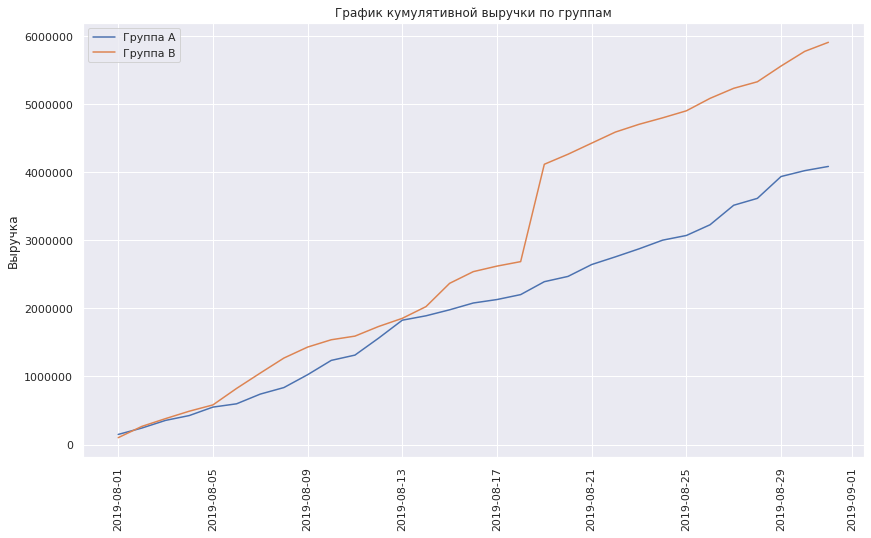

In [19]:
# Строим график выручки по группам
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = cumulativeRevenueA, x = "date", y = "revenue", label = 'Группа А')
sns.lineplot(data = cumulativeRevenueB, x = "date", y = "revenue", label = 'Группа B')
plt.xlabel('')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
#поворот подписей по оси х на 90 градусов
plt.xticks(rotation = 90) 
plt.legend();

Выручка достаточно равномерно увеличивается в течение всего теста. Но график выручки группы В в одной точке резко растет. Скорее всего это говорит о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем далее.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

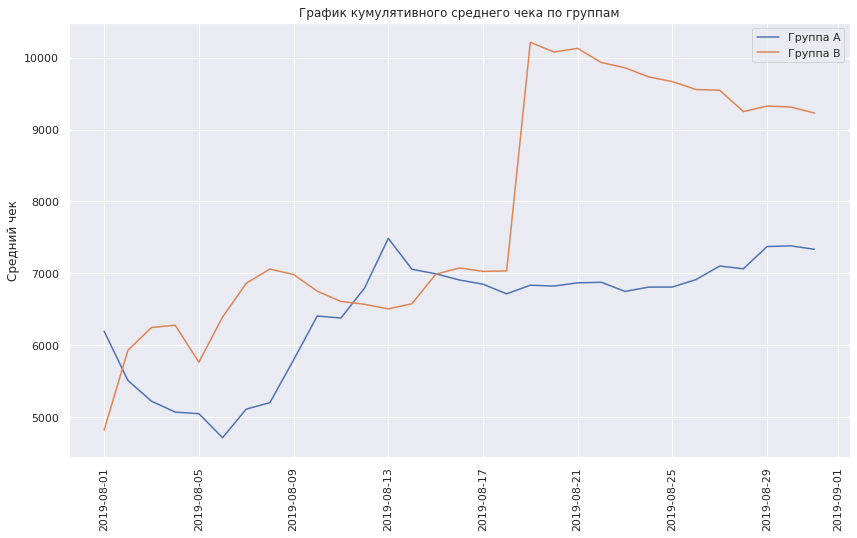

In [20]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = cumulativeRevenueA, x = 'date', y = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
            label = 'Группа А')
sns.lineplot(data = cumulativeRevenueB, x = 'date', y = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
            label = 'Группа В')
plt.xlabel('')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
#поворот подписей по оси х на 90 градусов
plt.xticks(rotation = 90)
plt.legend();

Опять же видим резкий подъем на графике группы В, нужно рассмотреть покупки группы В на предмет аномальных значений. Кроме этого нюанса средний чек различается несильно, графики переплетаются, покупатели в среднем платят одинаково. <br>
Построим график относительного различия для среднего чека.

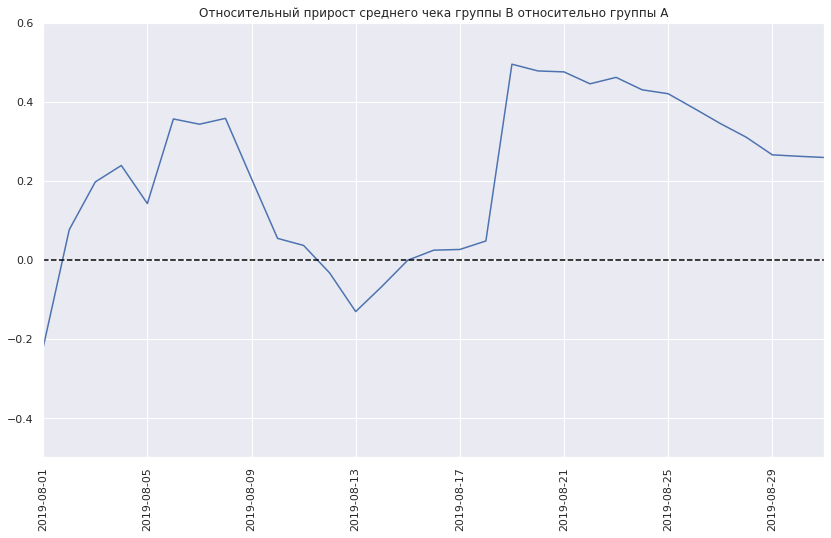

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
fig = plt.figure(figsize = (14, 8))
sns.lineplot(x = mergedCumulativeRevenue['date'], 
             y = (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
             (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('')
plt.ylabel('')
plt.title('Относительный прирост среднего чека группы B относительно группы A')
#развернем подписи оси х на 90 градусов
plt.xticks(rotation = 90)
#добавим горизонтальную ось в точке y = 0
plt.axhline(y = 0, color = 'black', linestyle='--')
#установим лимиты графика
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.6]);

В нескольких точках график различия между группам резко «скачет». В середине исследуемого периода резкий провал, хотя до этого заметен довольно значительный прирост группы В относительно группы А. Где-то точно спрятались крупные заказы и выбросы.

Далее проанализируем график кумулятивной конверсии. Получим датафреймы с кумулятивными показателями по группам А и В.

In [22]:
#срезы по группам А и В
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
#ознакомимся с результатом
display(cumulativeDataA.head())
display(cumulativeDataB.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


Объединим полученные датафреймы (точнее их столбцы с датой и конверсией).

In [23]:
#объединим полученные датафреймы при помощи функции merge по столбцам 'date' и 'conversion'
#полученным столбцам с конверсией присвоим суффиксы групп А и В
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Проанализируем график кумулятивной конверсии. 

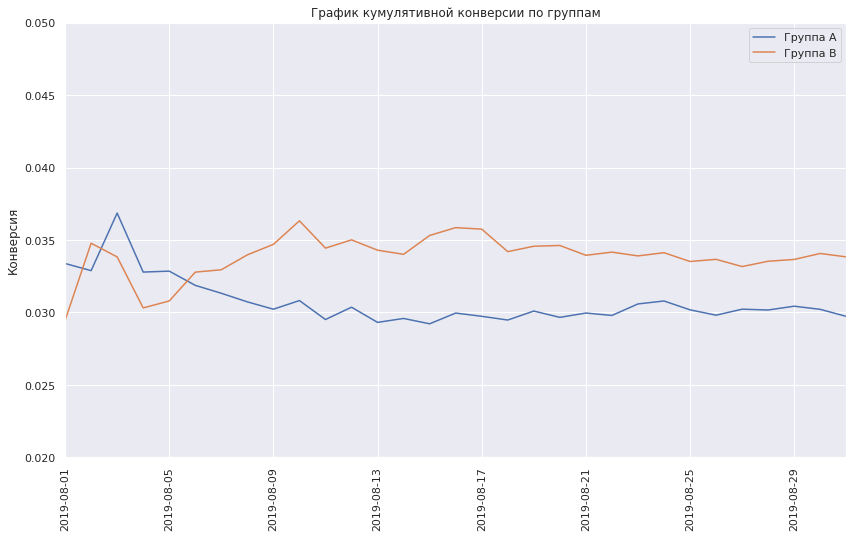

In [24]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = mergedCumulativeConversions, x = 'date', y = 'conversionA', label = 'Группа А')
sns.lineplot(data = mergedCumulativeConversions, x = 'date', y = 'conversionB', label = 'Группа B')
plt.xlabel('')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
#развернем подписи оси х на 90 градусов
plt.xticks(rotation = 90)
#изменим масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05])
plt.legend();

График достаточно симметричен. Через некотрое время после старта теста конверсия группы B вырвалась впередии зафиксировалась на стабильном значении.

Построим график относительного различия кумулятивных конверсий:

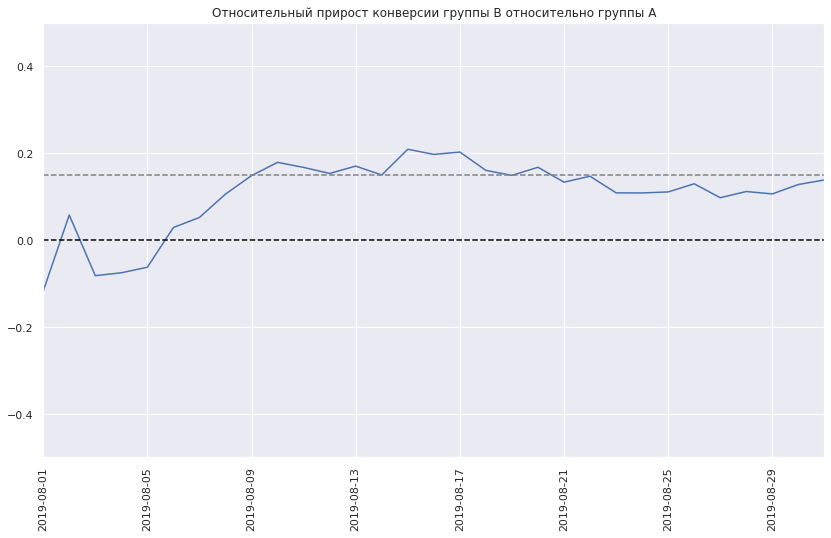

In [25]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = mergedCumulativeConversions, 
             x = 'date', 
             y = mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.xlabel('')
plt.ylabel('')
plt.title('Относительный прирост конверсии группы B относительно группы A')
#развернем подписи оси х на 90 градусов
plt.xticks(rotation = 90)
#горизонтальная линия y = 0
plt.axhline(y = 0, color = 'black', linestyle='--')
plt.axhline(y = 0.15, color = 'grey', linestyle='--')
#изменим масштаб осей
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.5]);

После слабого старта конверсия группы В вырвалась вперед и оставалась стабильно выше конверсии группы А, хотя прирост со временем замедлился.

#### 2.2 Анализ выбросов <a id='step2-2'></a>

Построим точечный график кол-ва заказов по пользователям.

In [26]:
#сводная таблица кол-ва заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index = False).agg(
    {'transactionId' : pd.Series.nunique}).sort_values(by = 'transactionId', ascending = False)
#переименуем столбцы датафрейма
ordersByUsers.columns = ['userId','orders']
#ознакомимся с результатом
ordersByUsers

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Оценим число заказов при помощи диаграммы рассеяния:

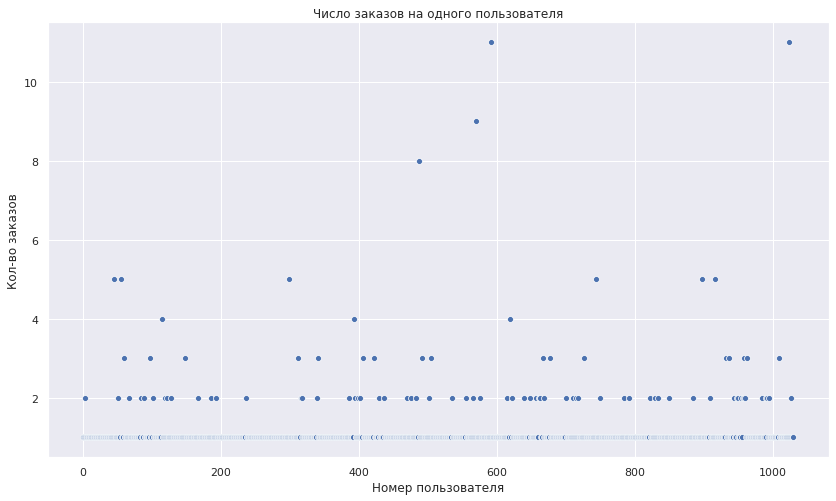

In [27]:
#зададим значения оси х как длину датафрейма с пользователями
x_values = pd.Series(range(0,len(ordersByUsers)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = ordersByUsers, x = x_values, y = 'orders')
plt.xlabel('Номер пользователя')
plt.ylabel('Кол-во заказов')
plt.title('Число заказов на одного пользователя');

Есть некоторое количество пользователей с большим количеством заказов (более 2). Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Будем считать выбросами пользователей с более чем двумя заказами.

Аналогично оценим стоимость заказов:

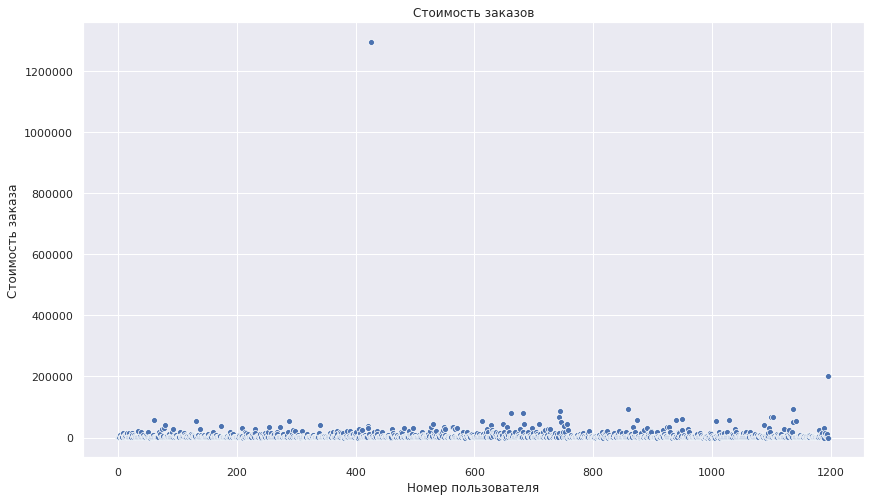

In [29]:
#зададим значения оси х как длину датафрейма с пользователями
x_values = pd.Series(range(0,len(orders)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = orders, x = x_values, y = 'revenue')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказов');

Наблюдаем явный выброс - заказ со стоимостью более 1200000, рассмотрим детальнее разброс заказов со стоимостью менее 200000:

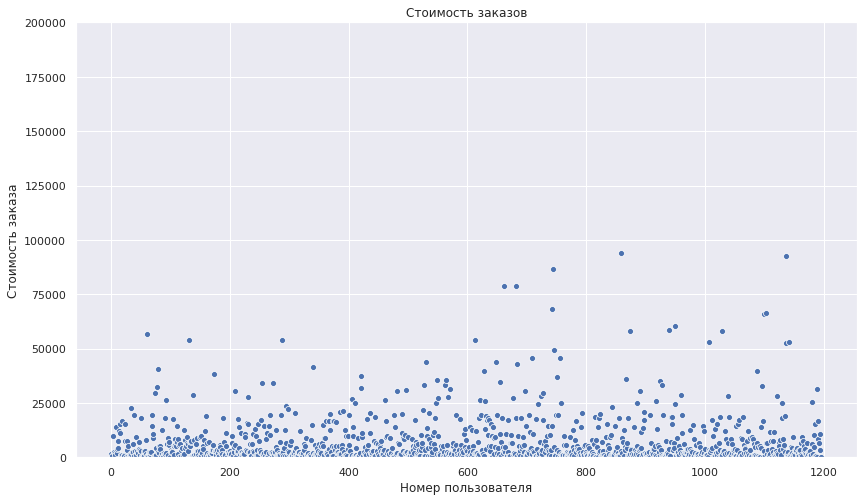

In [30]:
#зададим значения оси х как длину датафрейма с пользователями
x_values = pd.Series(range(0,len(orders)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = orders, x = x_values, y = 'revenue')
plt.ylim(0, 200000)
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказов');

Cтоимость большинства заказов явно не превышают 25 тысяч. Рассчитаем 95 и 99 перцентили:

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов обладали стоимостью более 28000.  Примем за выбросы заказы стоимостью выше 30000.

#### 2.3 Статистический анализ <a id='step2-3'></a>

Подготовим данные для статистических исследований нашего теста. Разобьем пользователей по группам и дням посещения и создадим таблица с кумулятивными данными.

In [32]:
#датафрейм с количеством пользователей группы А по датам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
#переименуем столбцы полученного датафрейма
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#применим лямбда-функцию для заполнения количества пользователей по каждой дате
#кумулятивным числом пользователей на эту дату
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#датафрейм с количеством пользователей группы В по датам
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
#переименуем столбцы полученного датафрейма
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#применим лямбда-функцию для заполнения количества пользователей по каждой дате
#кумулятивным числом пользователей на эту дату
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#проверим результаты манипуляций
display(visitorsACummulative.head(), visitorsBCummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Аналогично подготовим датафреймы по заказам. Получим датафреймы с ежедневным количеством заказов по группам и накопительным количеством заказов по дням.

In [33]:
#датафрейм с количеством заказов группы А по датам
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
#переименуем столбцы полученного датафрейма
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#применим лямбда-функцию для заполнения количества заказов по каждой дате 
#кумулятивным числом заказов на эту дату
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#датафрейм с количеством заказов группы В по датам
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
#переименуем столбцы полученного датафрейма
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#применим лямбда-функцию для заполнения количества заказов по каждой дате 
#кумулятивным числом заказов на эту дату
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#результат на экран
display(ordersACummulative.head(), ordersBCummulative.head())

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Объединим все полученные датафреймы по признаку 'date':

In [34]:
#проведем серию объединений при помощи функции merge
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Получим выборки по каждой группе с ID покупателя и количеством его заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Применим критерий Манна-Уитни для проверки гипотезы о равенстве конверсий по группам и отформатируем p-value, округлив его до трёх знаков после запятой. <br>
Примем за нулевую гипотезу <br>
Н0: Конверсия группы В не отличается от конверсии группы А, соответственно, альтернативная гипотеза <br>
Н1: Конверсия группы А и группы В различна.

In [35]:
#сводная таблица кол-ва заказов по пользователям группы А
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
#переименуем столбцы
ordersByUsersA.columns = ['visitorId', 'orders']

#сводная таблица кол-ва заказов по пользователям группы В
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
#переименуем столбцы
ordersByUsersB.columns = ['visitorId', 'orders']

#добавим к таблице заказов по пользователям нулевые значения
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)
#проведем тест Манна-Уитни
print('{0:.3f} - p-value'
      .format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('{0:.3f} - относительный прирост конверсии группы B'.format(sampleB.mean()/sampleA.mean()-1)) 

0.008 - p-value
0.138 - относительный прирост конверсии группы B


P-value ниже общепринятого уровня статистический значимости (0.05), поэтому мы можем отвергнуть гипотезу о том, что между конверсиями групп А и В нет статистически значимых различий. Различия есть.

Теперь найдём относительные различия в среднем чеке между группами. <br>
Примем за нулевую гипотезу <br>
Н0: Средний чек группы В не отличается от среднего чека группы А, соответственно, альтернативная гипотеза <br>
Н1: Средний чек группы А и группы В различен.

In [36]:
#рассчитаем критерий Манна-Уитни
print('{0:.3f} - p-value'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f} - относительный прирост среднего чека группы B'.format(orders[orders['group']=='B']['revenue']
                       .mean() / orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365 - p-value
0.259 - относительный прирост среднего чека группы B


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом заметим, что средний чек группы В заметно больше среднего чека группы А.

Найденные ранее 95-й и 99-й перцентили средних чеков равны 28000 и  58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. <br>
Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. <br>
Узнаем, сколько всего аномальных пользователей методом shape().

In [37]:
#датафрейм с пользователями с кол-вом заказов более 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
#датафрейм с заказами стоимостью более 30000
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(pd.DataFrame(abnormalUsers.head(5)))
#кол-во аномальных пользователей методом shape
display(abnormalUsers.shape) 

,visitorId
1099,148427295
18,199603092
928,204675465
23,237748145
37,249864742


(68,)

Подготовим отфильтрованные выборки количества заказов по пользователям по группам теста:

In [38]:
#объединим датафреймы с кол-вом заказов по пользователям 
#с вычетом аномальных пользователей и пользователей с нулевым кол-вом заказов
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index = np.arange(data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])), name = 'orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index = np.arange(data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])), name = 'orders')],axis=0) 
display(sampleAFiltered.head(), sampleBFiltered.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Применим статистический критерий Манна-Уитни к полученным выборкам. <br>
Примем за нулевую гипотезу <br>
Н0: Конверсия группы В не отличается от конверсии группы А, соответственно, альтернативная гипотеза: <br>
Н1: Конверсия группы А и группы В различна.

In [39]:
print('{0:.3f} - p-value'
      .format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('{0:.3f} - относительный прирост конверсии группы B'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007 - p-value
0.172 - относительный прирост конверсии группы B


Результаты по конверсии изменились несильно. Достаточно заметно увеличился лишь прирост конверсии группы B.

Проверим изменения в среднем чеке, сначала построим график по отфильтрованной информации:

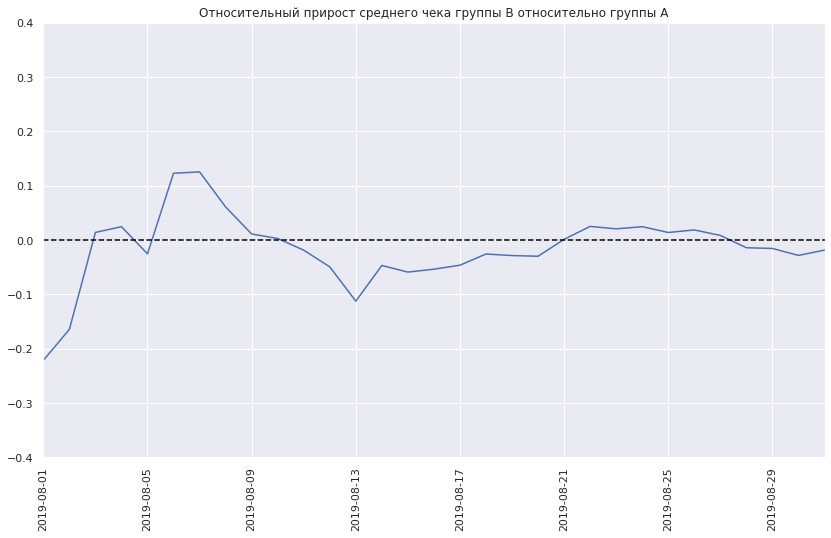

In [40]:
#датафрейм orders с заказами стоимостьб менее 30000
orders_f = orders[orders['revenue'] < 30000]
#датафрейм с парами уникальных значений "дата-группа"
datesGroups_f = orders_f[['date','group']].drop_duplicates()

ordersAggregated_f = datesGroups_f.apply(
lambda x: orders_f[np.logical_and(orders_f['date'] <= x['date'], orders_f['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#переименуем столбцы
ordersAggregated_f.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_f = ordersAggregated_f[ordersAggregated_f['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_f = ordersAggregated_f[ordersAggregated_f['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue_f = cumulativeRevenueA_f.merge(cumulativeRevenueB_f, 
                                                   left_on = 'date', 
                                                   right_on = 'date', 
                                                   how = 'left', 
                                                   suffixes = ['A', 'B'])


fig = plt.figure(figsize = (14, 8))
sns.lineplot(x = mergedCumulativeRevenue_f['date'], 
             y = (mergedCumulativeRevenue_f['revenueB'] / mergedCumulativeRevenue_f['ordersB']) /
             (mergedCumulativeRevenue_f['revenueA'] / mergedCumulativeRevenue_f['ordersA'])-1)
plt.xlabel('')
plt.ylabel('')
plt.title('Относительный прирост среднего чека группы B относительно группы A')
plt.xticks(rotation = 90)
plt.axhline(y = 0, color = 'black', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.4, 0.4]);

Как видно, после удаления выбросов колебания графика уменьшились, со временем относительный прирост стал практически нулевым.

Проведем тест Манна-Уитни и рассчитаем относительный прирост среднего чека группы В. <br>
Примем за нулевую гипотезу <br>
Н0: Средний чек группы В не отличается от среднего чека группы А, соответственно, альтернативная гипотеза: <br>
Н1: Средний чек группы А и группы В различен.

In [41]:
print('{0:.3f} - p-value'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A', #заказы пользователей группы А
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], #исключим заказы пользователей из abnormalUsers
    orders[np.logical_and(
        orders['group'] == 'B', #заказы пользователей группы B
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])) #исключим заказы пользователей abnormalUsers

print('{0:.3f} - относительный прирост среднего чека группы B'.format(
    orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.360 - p-value
-0.023 - относительный прирост среднего чека группы B


P-value практически не изменился, у нас нет оснований опровернуть гипотезу о равенстве среднего чека между группами А и В.<br>
А вот относительный прирост сильно уменьшился и стал отрицательным, правда, близким к нулю. Это стало результатом удаления аномальных значений суммы покупок (таких как 1200000). 

Теперь можно сделать следующие выводы:
- Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше результатов группы A и есть достаточно значимая тенденции к улучшению
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. После удаления выбросов можно сделать из этого графика вывод о малом различии средних чеков по группам А и В

### Часть 3. Общий вывод <a id='step3'></a>

По результатам тест можно принять решение остановить тест, зафиксировать победу группы В и признать предложенные изменения успешными. Хотя средний чек остался на неизменном уровне, конверсия достаточно сильно увеличилась (на 15-20% от начальных значений), это должно позволить увеличить выручку, что и было целью нововведений, предложенных для тестирования. <br>
Продолжать тест смысла нет: группа B статистически значимо лучше группы A по значению конверсии, график конверсии говорит о фиксации результата.